In [30]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import pickle as pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
TARGET_COLS=['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',"clean"]

from sklearn.model_selection import train_test_split


## UNIGRAMS 

In [31]:
import pandas as pd
target_x=pickle.load(open("../pickle/target_x1_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)


[[ 417  368]
 [ 490 2570]]
             precision    recall  f1-score   support

          0       0.46      0.53      0.49       785
          1       0.87      0.84      0.86      3060

avg / total       0.79      0.78      0.78      3845



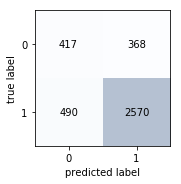

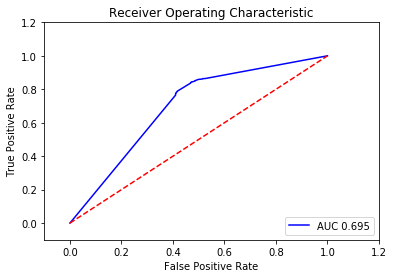

[[3099  445]
 [ 161  140]]
             precision    recall  f1-score   support

          0       0.95      0.87      0.91      3544
          1       0.24      0.47      0.32       301

avg / total       0.89      0.84      0.86      3845



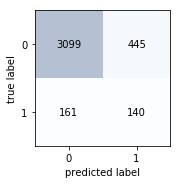

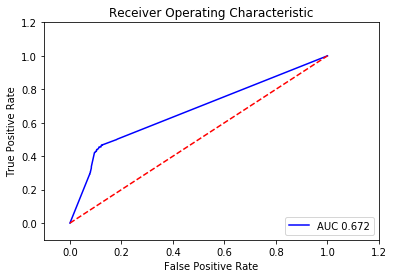

[[1756  377]
 [ 475 1237]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.80      2133
          1       0.77      0.72      0.74      1712

avg / total       0.78      0.78      0.78      3845



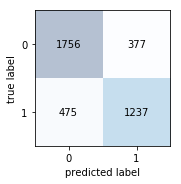

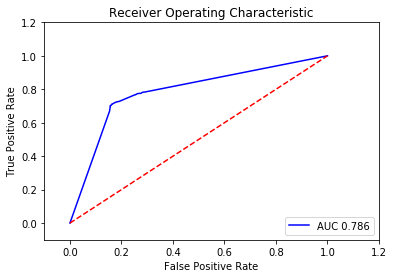

[[3406  342]
 [  60   37]]
             precision    recall  f1-score   support

          0       0.98      0.91      0.94      3748
          1       0.10      0.38      0.16        97

avg / total       0.96      0.90      0.92      3845



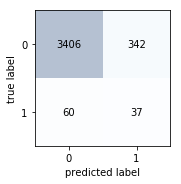

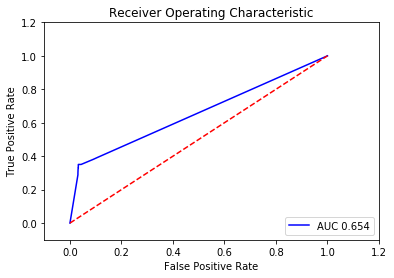

[[1666  613]
 [ 545 1021]]
             precision    recall  f1-score   support

          0       0.75      0.73      0.74      2279
          1       0.62      0.65      0.64      1566

avg / total       0.70      0.70      0.70      3845



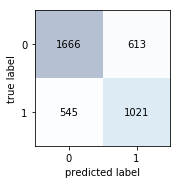

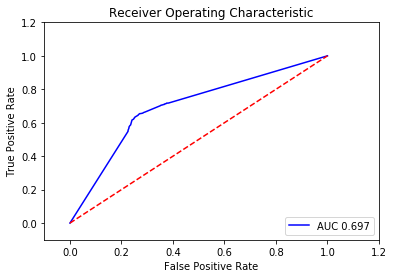

[[3026  542]
 [ 159  118]]
             precision    recall  f1-score   support

          0       0.95      0.85      0.90      3568
          1       0.18      0.43      0.25       277

avg / total       0.89      0.82      0.85      3845



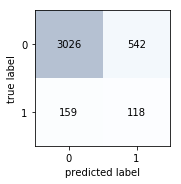

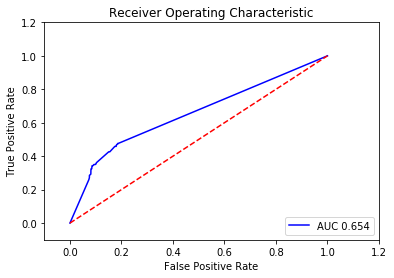

[[2734  503]
 [ 244  364]]
             precision    recall  f1-score   support

      False       0.92      0.84      0.88      3237
       True       0.42      0.60      0.49       608

avg / total       0.84      0.81      0.82      3845



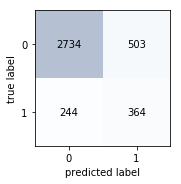

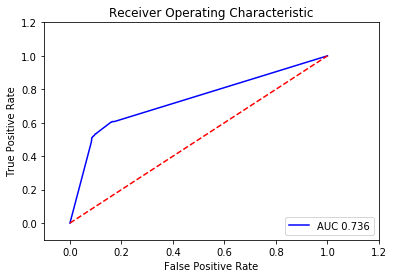

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("../data/ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## BIGRAMS

In [33]:
target_x=pickle.load(open("../pickle/target_x2_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 128  657]
 [ 288 2772]]
             precision    recall  f1-score   support

          0       0.31      0.16      0.21       785
          1       0.81      0.91      0.85      3060

avg / total       0.71      0.75      0.72      3845



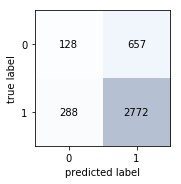

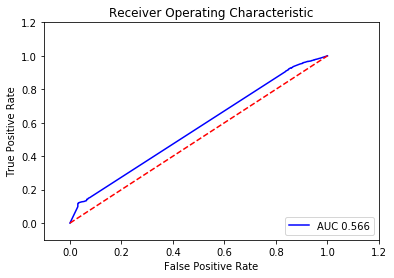

[[3312  225]
 [ 208  100]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      3537
          1       0.31      0.32      0.32       308

avg / total       0.89      0.89      0.89      3845



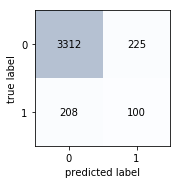

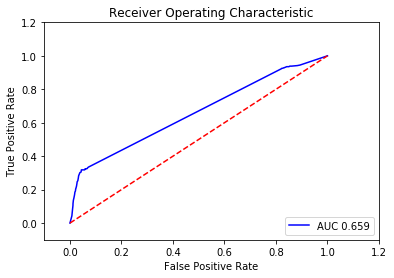

[[2061   89]
 [1353  342]]
             precision    recall  f1-score   support

          0       0.60      0.96      0.74      2150
          1       0.79      0.20      0.32      1695

avg / total       0.69      0.62      0.56      3845



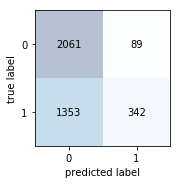

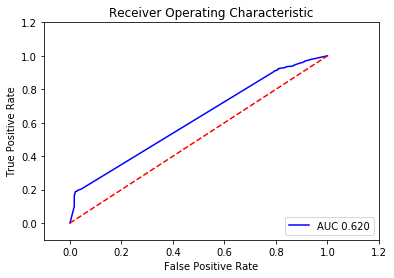

[[ 843 2911]
 [   9   82]]
             precision    recall  f1-score   support

          0       0.99      0.22      0.37      3754
          1       0.03      0.90      0.05        91

avg / total       0.97      0.24      0.36      3845



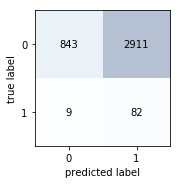

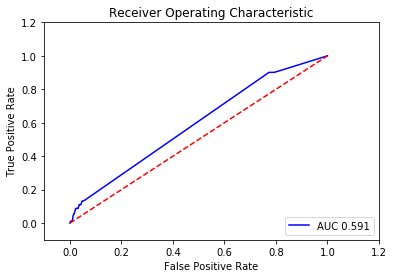

[[2112  151]
 [1271  311]]
             precision    recall  f1-score   support

          0       0.62      0.93      0.75      2263
          1       0.67      0.20      0.30      1582

avg / total       0.64      0.63      0.57      3845



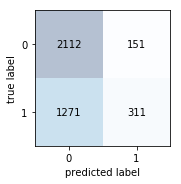

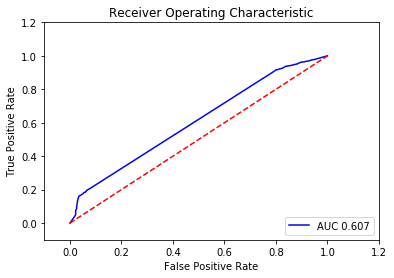

[[ 728 2850]
 [  33  234]]
             precision    recall  f1-score   support

          0       0.96      0.20      0.34      3578
          1       0.08      0.88      0.14       267

avg / total       0.90      0.25      0.32      3845



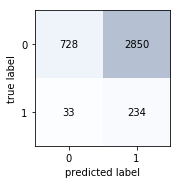

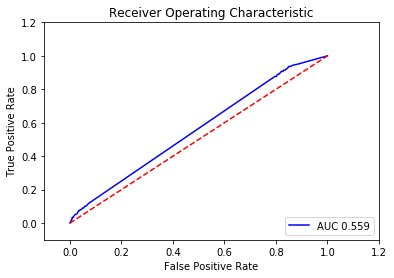

[[2938  295]
 [ 475  137]]
             precision    recall  f1-score   support

      False       0.86      0.91      0.88      3233
       True       0.32      0.22      0.26       612

avg / total       0.77      0.80      0.79      3845



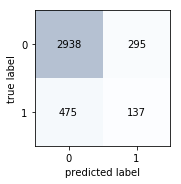

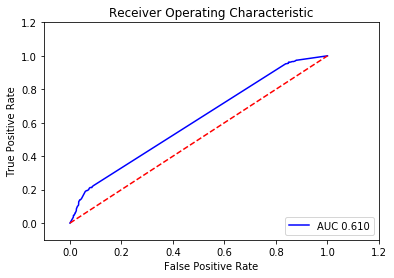

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("../data/ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## CHARNGRAM

In [27]:
target_x=pickle.load(open("../pickle/target_x3_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 167  630]
 [ 258 2790]]
             precision    recall  f1-score   support

          0       0.39      0.21      0.27       797
          1       0.82      0.92      0.86      3048

avg / total       0.73      0.77      0.74      3845



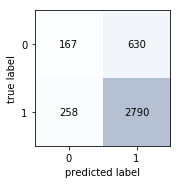

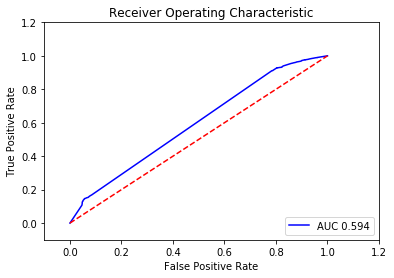

[[3317  212]
 [ 221   95]]
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      3529
          1       0.31      0.30      0.30       316

avg / total       0.89      0.89      0.89      3845



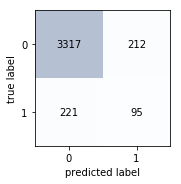

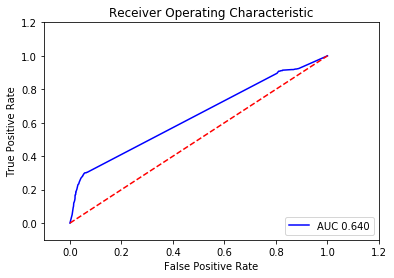

[[2027   87]
 [1401  330]]
             precision    recall  f1-score   support

          0       0.59      0.96      0.73      2114
          1       0.79      0.19      0.31      1731

avg / total       0.68      0.61      0.54      3845



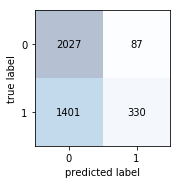

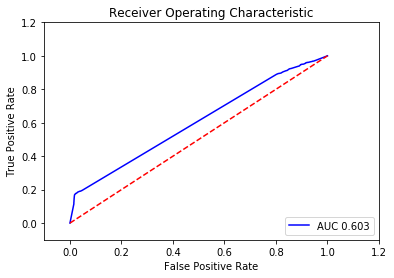

[[ 779 2967]
 [   6   93]]
             precision    recall  f1-score   support

          0       0.99      0.21      0.34      3746
          1       0.03      0.94      0.06        99

avg / total       0.97      0.23      0.34      3845



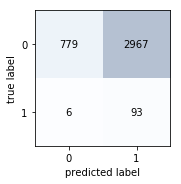

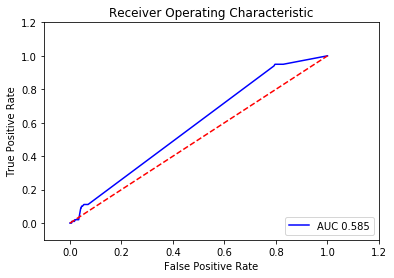

[[2121  193]
 [1239  292]]
             precision    recall  f1-score   support

          0       0.63      0.92      0.75      2314
          1       0.60      0.19      0.29      1531

avg / total       0.62      0.63      0.57      3845



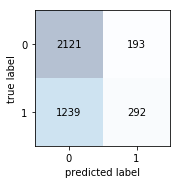

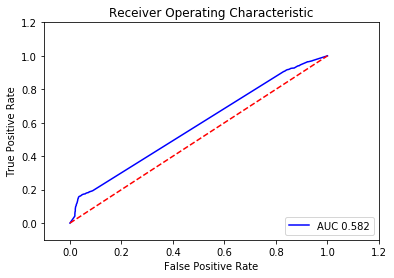

[[ 727 2821]
 [  45  252]]
             precision    recall  f1-score   support

          0       0.94      0.20      0.34      3548
          1       0.08      0.85      0.15       297

avg / total       0.88      0.25      0.32      3845



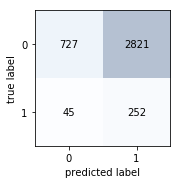

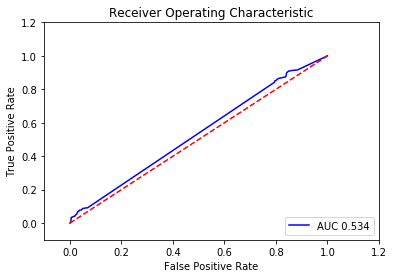

[[2985  290]
 [ 456  114]]
             precision    recall  f1-score   support

      False       0.87      0.91      0.89      3275
       True       0.28      0.20      0.23       570

avg / total       0.78      0.81      0.79      3845



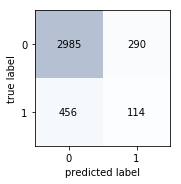

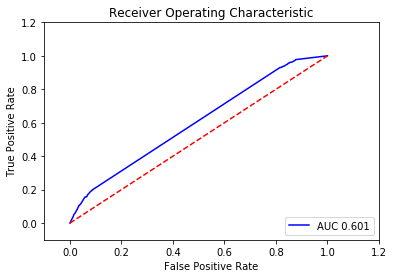

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## SELECTED FEATURES

In [36]:
target_x=pickle.load(open("../pickle/target_x4_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 232  553]
 [ 539 2521]]
             precision    recall  f1-score   support

          0       0.30      0.30      0.30       785
          1       0.82      0.82      0.82      3060

avg / total       0.71      0.72      0.72      3845



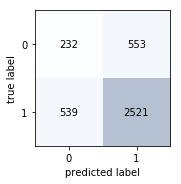

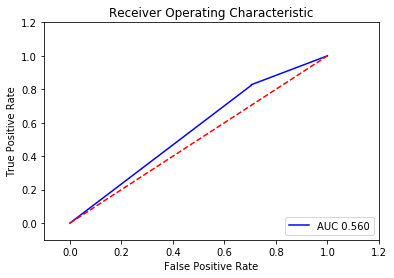

[[3193  307]
 [ 287   58]]
             precision    recall  f1-score   support

          0       0.92      0.91      0.91      3500
          1       0.16      0.17      0.16       345

avg / total       0.85      0.85      0.85      3845



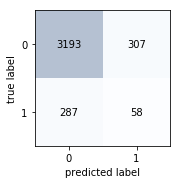

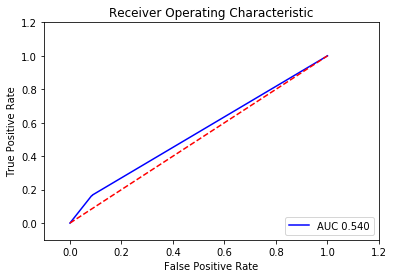

[[1262  889]
 [ 866  828]]
             precision    recall  f1-score   support

          0       0.59      0.59      0.59      2151
          1       0.48      0.49      0.49      1694

avg / total       0.54      0.54      0.54      3845



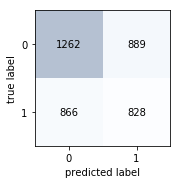

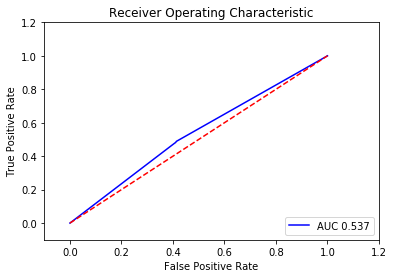

[[3652  111]
 [  82    0]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3763
          1       0.00      0.00      0.00        82

avg / total       0.96      0.95      0.95      3845



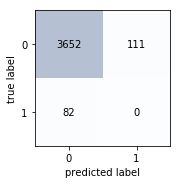

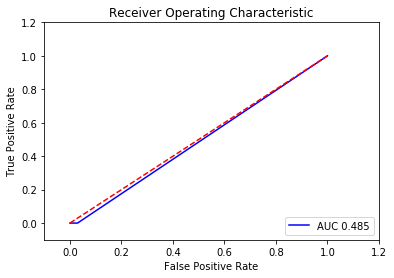

[[1374  855]
 [ 910  706]]
             precision    recall  f1-score   support

          0       0.60      0.62      0.61      2229
          1       0.45      0.44      0.44      1616

avg / total       0.54      0.54      0.54      3845



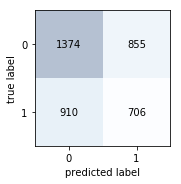

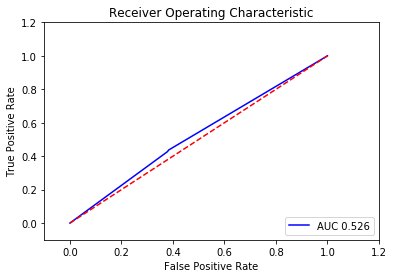

[[3319  276]
 [ 227   23]]
             precision    recall  f1-score   support

          0       0.94      0.92      0.93      3595
          1       0.08      0.09      0.08       250

avg / total       0.88      0.87      0.87      3845



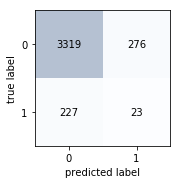

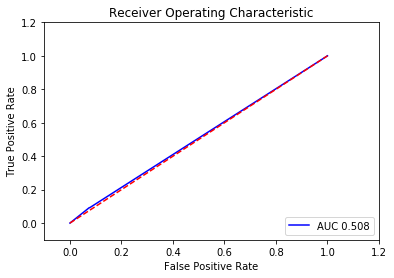

[[2788  494]
 [ 436  127]]
             precision    recall  f1-score   support

      False       0.86      0.85      0.86      3282
       True       0.20      0.23      0.21       563

avg / total       0.77      0.76      0.76      3845



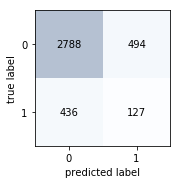

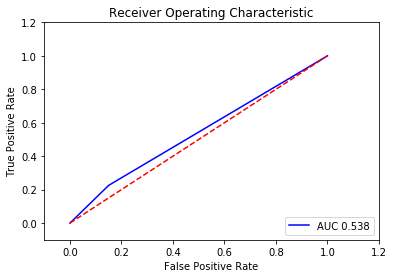

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## WORDVECTORS - GLOVE

In [38]:
target_x=pickle.load(open("../pickle/target_x5_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

print(target_x.shape)
print
X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

(19225, 3)


[[   0  785]
 [   0 3060]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       785
          1       0.80      1.00      0.89      3060

avg / total       0.63      0.80      0.71      3845



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


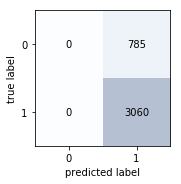

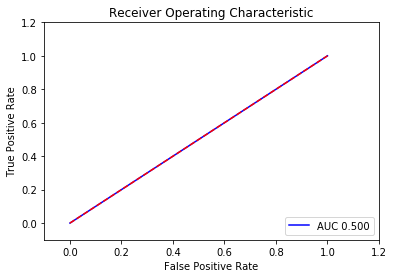

[[3530    0]
 [ 315    0]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3530
          1       0.00      0.00      0.00       315

avg / total       0.84      0.92      0.88      3845



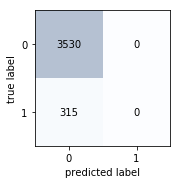

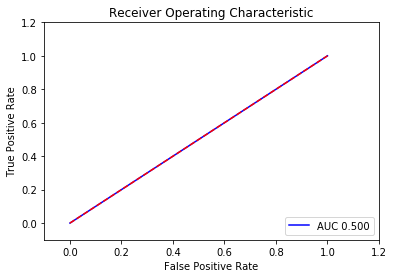

[[   0 2145]
 [   0 1700]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2145
          1       0.44      1.00      0.61      1700

avg / total       0.20      0.44      0.27      3845



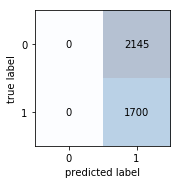

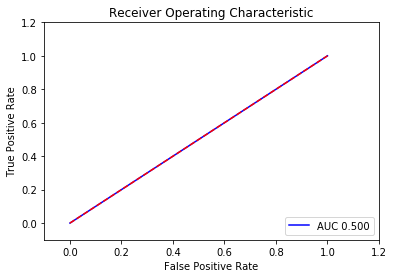

[[   0 3761]
 [   0   84]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3761
          1       0.02      1.00      0.04        84

avg / total       0.00      0.02      0.00      3845



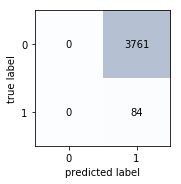

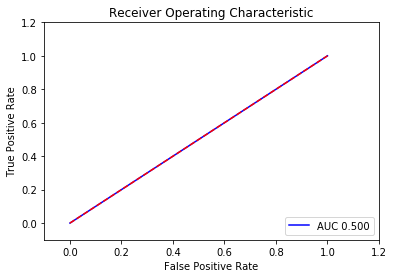

[[   0 2281]
 [   0 1564]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2281
          1       0.41      1.00      0.58      1564

avg / total       0.17      0.41      0.24      3845



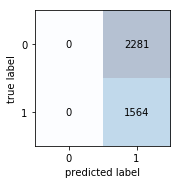

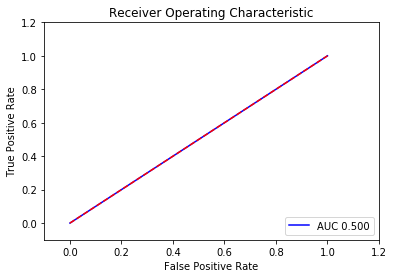

[[3552    0]
 [ 293    0]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3552
          1       0.00      0.00      0.00       293

avg / total       0.85      0.92      0.89      3845



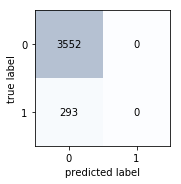

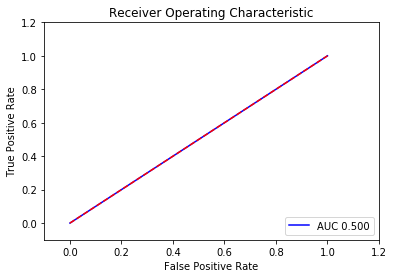

[[3261    0]
 [ 584    0]]
             precision    recall  f1-score   support

      False       0.85      1.00      0.92      3261
       True       0.00      0.00      0.00       584

avg / total       0.72      0.85      0.78      3845



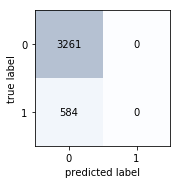

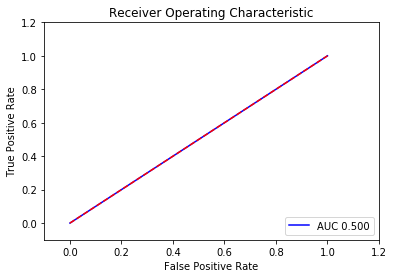

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
#     X_train=(pd.DataFrame(X_train.toarray()))
#     X_valid=(pd.DataFrame(X_valid.toarray()))
#     if i==0:
#         dfindex=((X_valid).iloc[:,0])
#     X_train=X_train.drop(X_train.columns[[0]], axis=1)
#     X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_charngrams,train_unigrams,train_feats[SELECTED_COLS])).tocsr()

In [40]:
target_x=pickle.load(open("../pickle/target_x6_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 372  413]
 [ 409 2651]]
             precision    recall  f1-score   support

          0       0.48      0.47      0.48       785
          1       0.87      0.87      0.87      3060

avg / total       0.79      0.79      0.79      3845



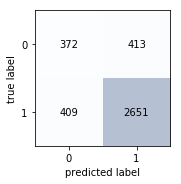

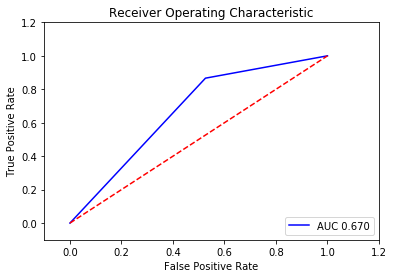

[[3244  277]
 [ 193  131]]
             precision    recall  f1-score   support

          0       0.94      0.92      0.93      3521
          1       0.32      0.40      0.36       324

avg / total       0.89      0.88      0.88      3845



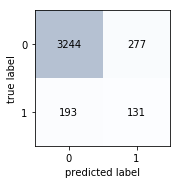

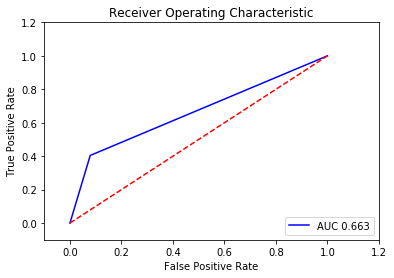

[[1768  365]
 [ 353 1359]]
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2133
          1       0.79      0.79      0.79      1712

avg / total       0.81      0.81      0.81      3845



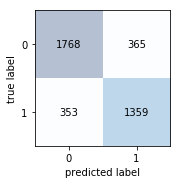

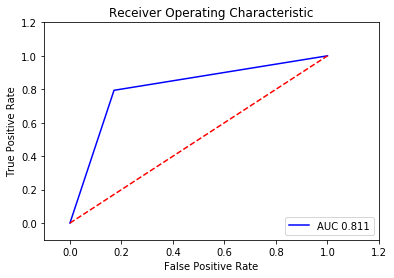

[[3653  104]
 [  59   29]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      3757
          1       0.22      0.33      0.26        88

avg / total       0.97      0.96      0.96      3845



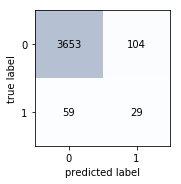

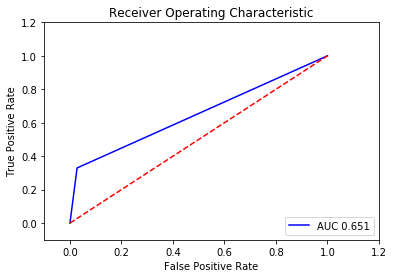

[[1658  614]
 [ 533 1040]]
             precision    recall  f1-score   support

          0       0.76      0.73      0.74      2272
          1       0.63      0.66      0.64      1573

avg / total       0.70      0.70      0.70      3845



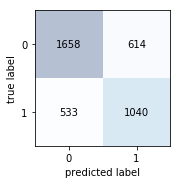

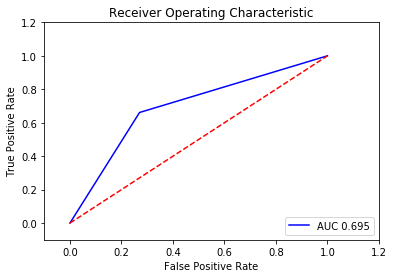

[[3327  242]
 [ 141  135]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.95      3569
          1       0.36      0.49      0.41       276

avg / total       0.92      0.90      0.91      3845



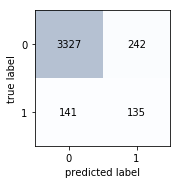

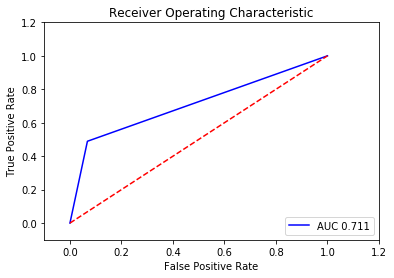

[[2986  269]
 [ 245  345]]
             precision    recall  f1-score   support

      False       0.92      0.92      0.92      3255
       True       0.56      0.58      0.57       590

avg / total       0.87      0.87      0.87      3845



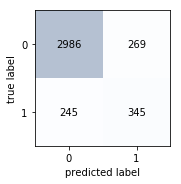

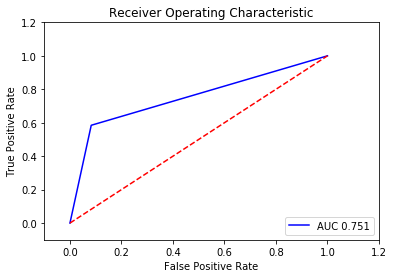

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_unigrams)).tocsr()

In [42]:
target_x=pickle.load(open("../pickle/target_x7_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 402  383]
 [ 470 2590]]
             precision    recall  f1-score   support

          0       0.46      0.51      0.49       785
          1       0.87      0.85      0.86      3060

avg / total       0.79      0.78      0.78      3845



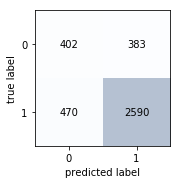

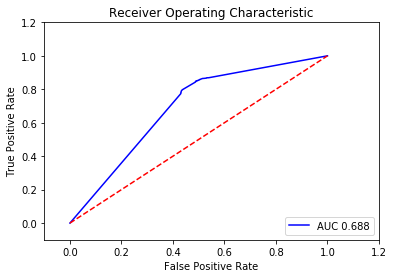

[[3099  422]
 [ 190  134]]
             precision    recall  f1-score   support

          0       0.94      0.88      0.91      3521
          1       0.24      0.41      0.30       324

avg / total       0.88      0.84      0.86      3845



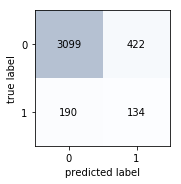

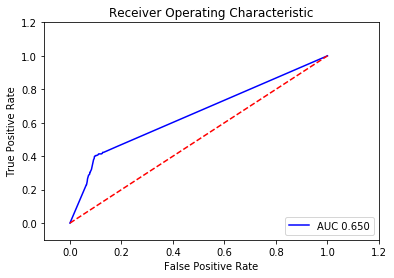

[[1749  417]
 [ 503 1176]]
             precision    recall  f1-score   support

          0       0.78      0.81      0.79      2166
          1       0.74      0.70      0.72      1679

avg / total       0.76      0.76      0.76      3845



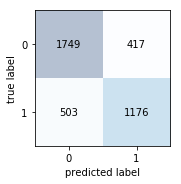

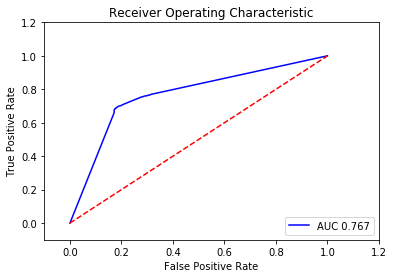

[[3407  354]
 [  51   33]]
             precision    recall  f1-score   support

          0       0.99      0.91      0.94      3761
          1       0.09      0.39      0.14        84

avg / total       0.97      0.89      0.93      3845



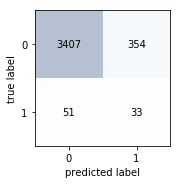

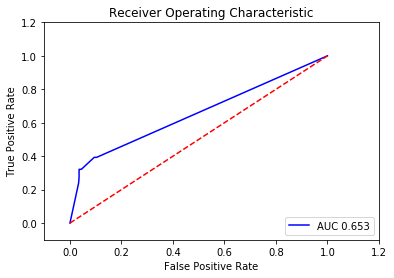

[[1624  641]
 [ 618  962]]
             precision    recall  f1-score   support

          0       0.72      0.72      0.72      2265
          1       0.60      0.61      0.60      1580

avg / total       0.67      0.67      0.67      3845



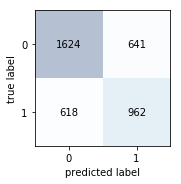

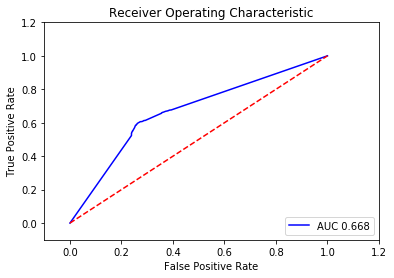

[[2955  598]
 [ 172  120]]
             precision    recall  f1-score   support

          0       0.94      0.83      0.88      3553
          1       0.17      0.41      0.24       292

avg / total       0.89      0.80      0.84      3845



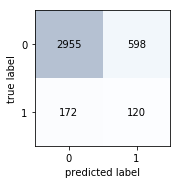

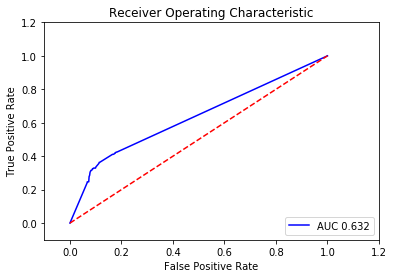

[[2719  525]
 [ 210  391]]
             precision    recall  f1-score   support

      False       0.93      0.84      0.88      3244
       True       0.43      0.65      0.52       601

avg / total       0.85      0.81      0.82      3845



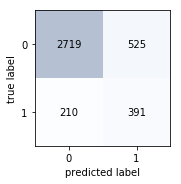

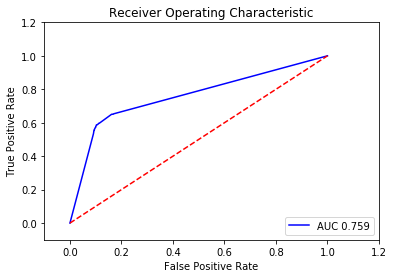

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams)).tocsr()

In [44]:
target_x=pickle.load(open("../pickle/target_x8_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 386  399]
 [ 392 2668]]
             precision    recall  f1-score   support

          0       0.50      0.49      0.49       785
          1       0.87      0.87      0.87      3060

avg / total       0.79      0.79      0.79      3845



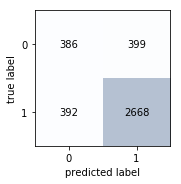

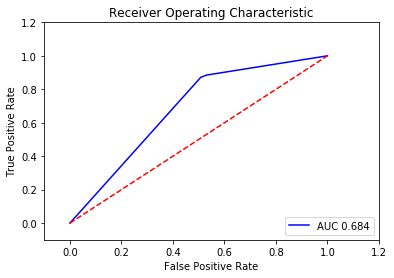

[[3193  331]
 [ 183  138]]
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      3524
          1       0.29      0.43      0.35       321

avg / total       0.89      0.87      0.88      3845



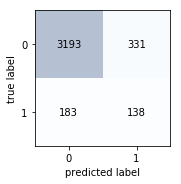

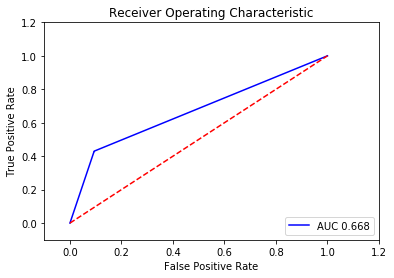

[[1751  378]
 [ 348 1368]]
             precision    recall  f1-score   support

          0       0.83      0.82      0.83      2129
          1       0.78      0.80      0.79      1716

avg / total       0.81      0.81      0.81      3845



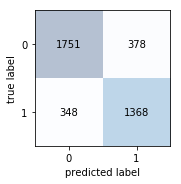

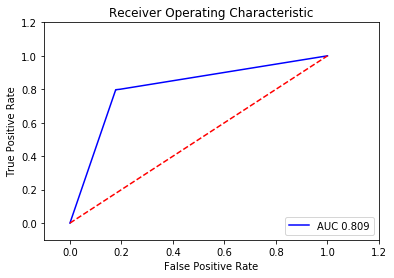

[[3597  142]
 [  69   37]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3739
          1       0.21      0.35      0.26       106

avg / total       0.96      0.95      0.95      3845



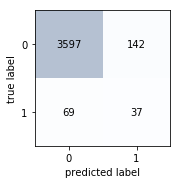

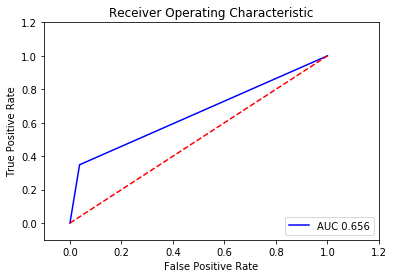

[[1644  668]
 [ 519 1014]]
             precision    recall  f1-score   support

          0       0.76      0.71      0.73      2312
          1       0.60      0.66      0.63      1533

avg / total       0.70      0.69      0.69      3845



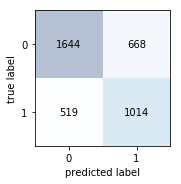

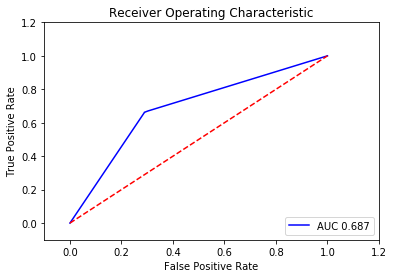

[[3296  266]
 [ 150  133]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.94      3562
          1       0.33      0.47      0.39       283

avg / total       0.91      0.89      0.90      3845



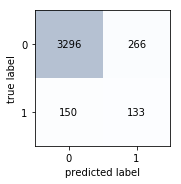

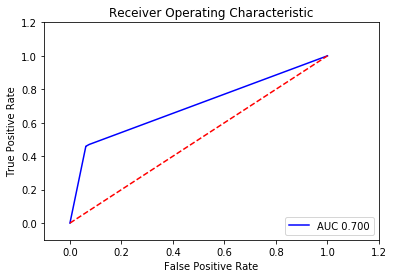

[[2961  310]
 [ 253  321]]
             precision    recall  f1-score   support

      False       0.92      0.91      0.91      3271
       True       0.51      0.56      0.53       574

avg / total       0.86      0.85      0.86      3845



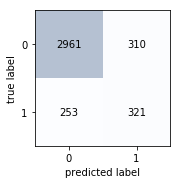

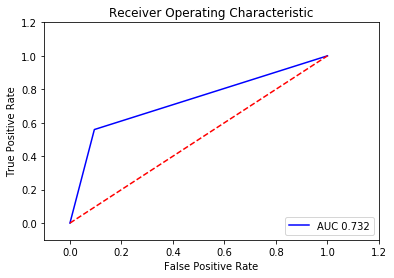

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams,train_bigrams)).tocsr()

In [46]:
target_x=pickle.load(open("../pickle/target_x9_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
y_test.shape

(3076, 7)

[[ 398  387]
 [ 419 2641]]
             precision    recall  f1-score   support

          0       0.49      0.51      0.50       785
          1       0.87      0.86      0.87      3060

avg / total       0.79      0.79      0.79      3845



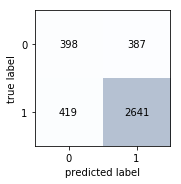

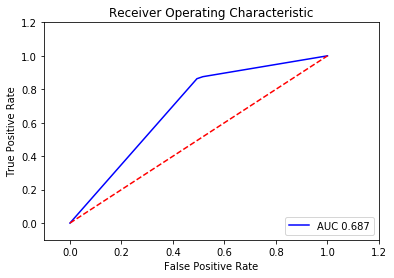

[[3205  319]
 [ 192  129]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.93      3524
          1       0.29      0.40      0.34       321

avg / total       0.89      0.87      0.88      3845



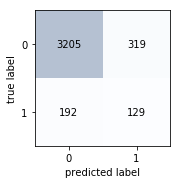

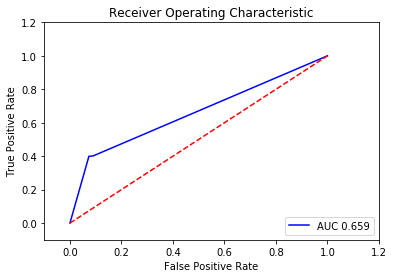

[[1793  394]
 [ 354 1304]]
             precision    recall  f1-score   support

          0       0.84      0.82      0.83      2187
          1       0.77      0.79      0.78      1658

avg / total       0.81      0.81      0.81      3845



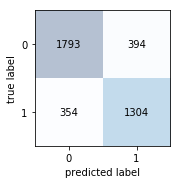

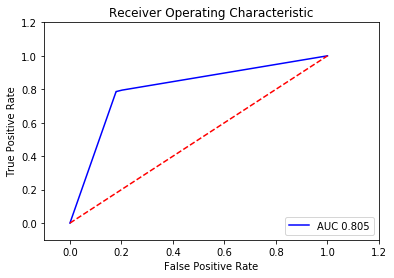

[[3598  147]
 [  60   40]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3745
          1       0.21      0.40      0.28       100

avg / total       0.96      0.95      0.95      3845



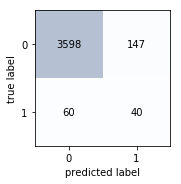

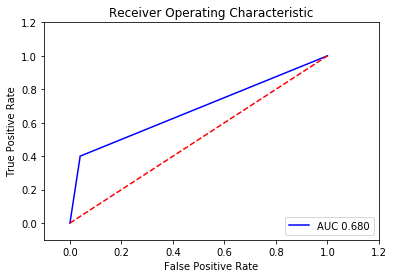

[[1599  649]
 [ 552 1045]]
             precision    recall  f1-score   support

          0       0.74      0.71      0.73      2248
          1       0.62      0.65      0.64      1597

avg / total       0.69      0.69      0.69      3845



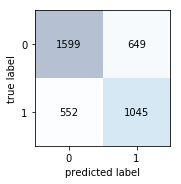

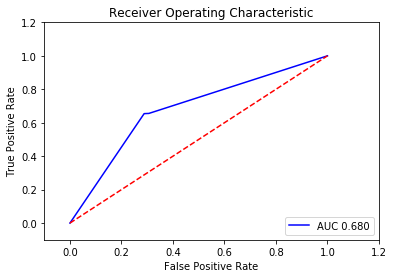

[[3325  268]
 [ 134  118]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.94      3593
          1       0.31      0.47      0.37       252

avg / total       0.92      0.90      0.91      3845



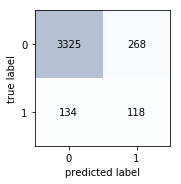

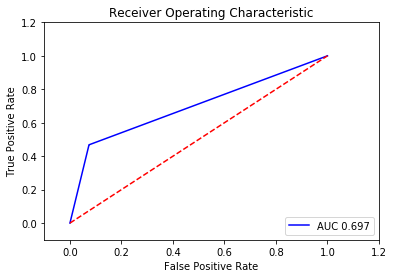

[[2956  290]
 [ 227  372]]
             precision    recall  f1-score   support

      False       0.93      0.91      0.92      3246
       True       0.56      0.62      0.59       599

avg / total       0.87      0.87      0.87      3845



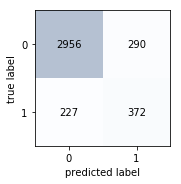

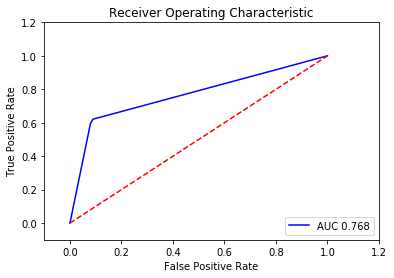

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   
